 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [72]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df_nulls = pd.isnull(whale_returns_df).count()
whale_returns_df_nulls

Date                           1060
SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df_nulls = pd.isnull(algo_returns_df).count()
algo_returns_df_nulls

Date      1241
Algo 1    1241
Algo 2    1241
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_path)
sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types for S&P 500 
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types for S&P Returns
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('[#,@,&,$]', '') 
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df['Date'])
sp500_history_df.set_index('Date', inplace = True)
sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'])
sp500_history_df['Close'] = sp500_history_df['Close'].astype('int')
sp500_history_df.dtypes

Close    int32
dtype: object

In [11]:
# Check Data Types for Algorithmic Daily Returns
algo_returns_df.dtypes


Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [12]:
# Check Data Types for Whale Returns
whale_returns_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [13]:
# Set Date to index for Algorithmic Daily Returns and Whale Returns
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df['Date'])
whale_returns_df.set_index('Date', inplace = True)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df['Date'])
algo_returns_df.set_index('Date', inplace = True)

In [14]:
# Print Indexed and Fixed S&P 500 Data Frame
sp500_history_df

,Close
Date,
2019-04-23,2933
2019-04-22,2907
2019-04-18,2905
2019-04-17,2900
2019-04-16,2907
...,...
2012-10-05,1460
2012-10-04,1461
2012-10-03,1450


In [15]:
# Print Indexed and Fixed Whale Returns Data Frame
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [16]:
# Print Indexed and Fixed Algorithmic Daily Returns Data Frame
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [17]:
# Calculate Daily Returns of S&P 500
daily_sp500_returns_df = sp500_history_df.pct_change()
daily_sp500_returns_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008865
2019-04-18,-0.000688
2019-04-17,-0.001721
2019-04-16,0.002414
...,...
2012-10-05,0.003436
2012-10-04,0.000685
2012-10-03,-0.007529


In [18]:
# Drop nulls
daily_sp500_returns_dropna_df = daily_sp500_returns_df.dropna()
daily_sp500_returns_dropna_df

,Close
Date,
2019-04-22,-0.008865
2019-04-18,-0.000688
2019-04-17,-0.001721
2019-04-16,0.002414
2019-04-15,-0.000688
...,...
2012-10-05,0.003436
2012-10-04,0.000685
2012-10-03,-0.007529


In [19]:
# Rename `Close` Column to be specific to this portfolio.
daily_sp500_returns_dropna_df.columns = ["S&P 500"]
daily_sp500_returns_dropna_df

,S&P 500
Date,
2019-04-22,-0.008865
2019-04-18,-0.000688
2019-04-17,-0.001721
2019-04-16,0.002414
2019-04-15,-0.000688
...,...
2012-10-05,0.003436
2012-10-04,0.000685
2012-10-03,-0.007529


## Combine Whale, Algorithmic, and S&P 500 Returns

In [62]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Whale_Algo_SP500_Daily_Returns = whale_returns_df.join([algo_returns_df,daily_sp500_returns_dropna_df], how = 'inner')
Whale_Algo_SP500_Daily_Returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004290
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001428
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014486
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003848
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017123
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000688
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002414
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001721


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

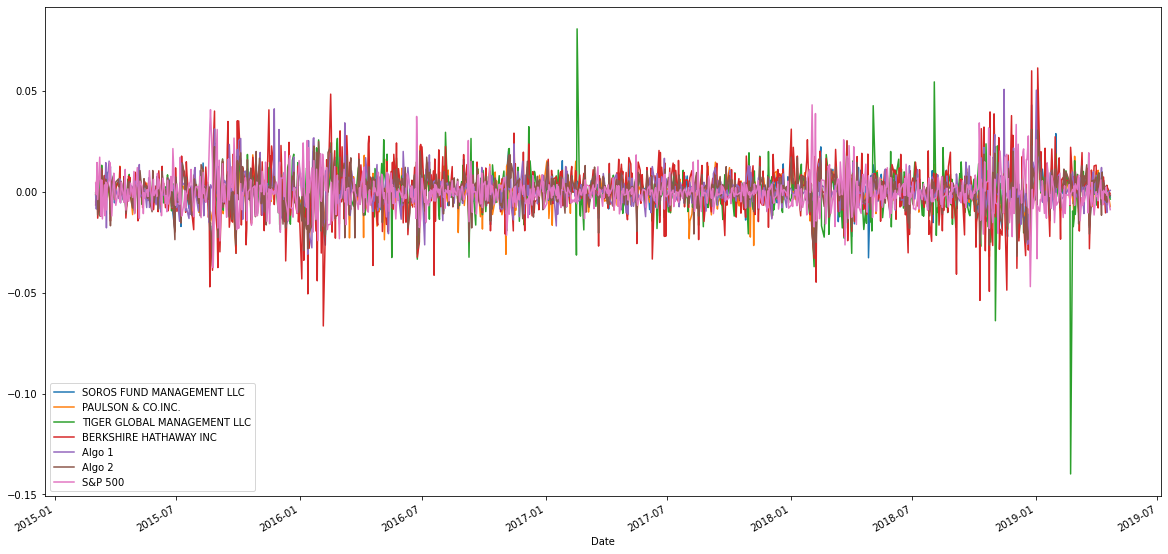

In [63]:
# Plot daily returns of all portfolios
Whale_Algo_SP500_Daily_Returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

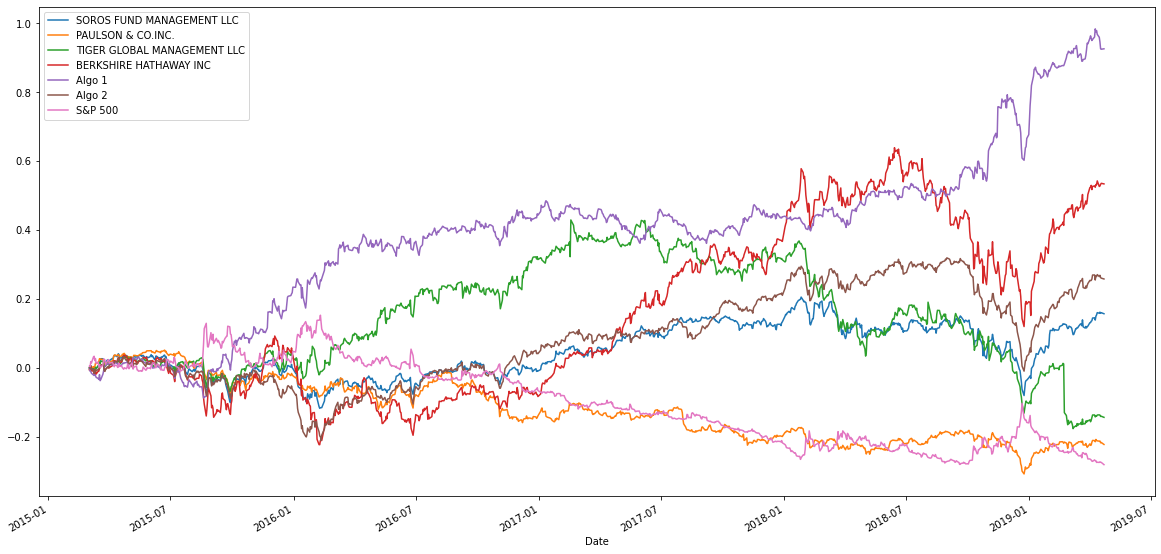

In [64]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + Whale_Algo_SP500_Daily_Returns).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

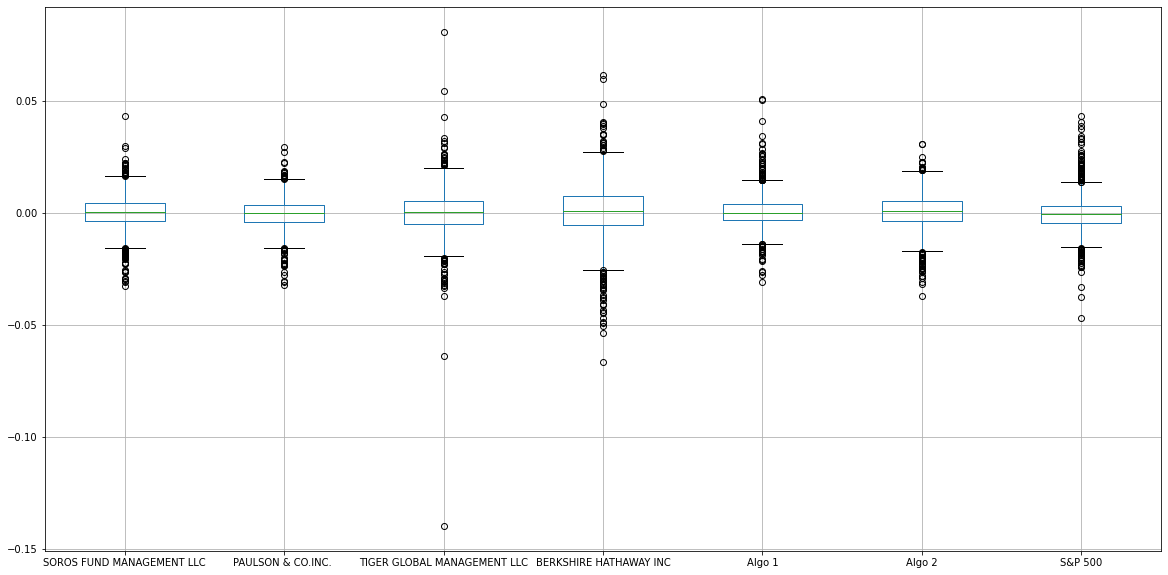

In [65]:
# Box plot to visually show risk
Whale_Algo_SP500_Daily_Returns.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [66]:
# Calculate the daily standard deviations of all portfolios
Std_Dev_Portfolio = Whale_Algo_SP500_Daily_Returns.std()
Std_Dev_Portfolio

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008586
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [67]:
# Calculate  the daily standard deviation of S&P 500
Std_Dev_SP500 = Whale_Algo_SP500_Daily_Returns["S&P 500"].std()
Std_Dev_SP500
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = Std_Dev_Portfolio.loc[Std_Dev_Portfolio > Std_Dev_SP500]
print(f" {riskier_portfolios.index.values} are riskier portfolios than the S&P 500 portfolio.")


 ['TIGER GLOBAL MANAGEMENT LLC' 'BERKSHIRE HATHAWAY INC'] are riskier portfolios than the S&P 500 portfolio.


### Calculate the Annualized Standard Deviation

In [68]:
# Calculate the annualized standard deviation (252 trading days)
Std_Dev_Portfolio_1yr = Whale_Algo_SP500_Daily_Returns.rolling(window = 252).std()
Std_Dev_Portfolio_1yr.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2016-03-01,0.008894,0.006472,0.009570,0.015030,0.009682,0.009962,0.010635
2016-03-02,0.008900,0.006467,0.009570,0.015025,0.009680,0.009988,0.010634
2016-03-03,0.008899,0.006466,0.009569,0.015025,0.009665,0.009998,0.010636
2016-03-04,0.008899,0.006464,0.009568,0.015086,0.009669,0.010007,0.010598
2016-03-07,0.008893,0.006484,0.009562,0.015088,0.009666,0.010025,0.010617
...,...,...,...,...,...,...,...
2019-04-15,0.009406,0.007337,0.014707,0.015248,0.008196,0.008608,0.009482
2019-04-16,0.009383,0.007333,0.014700,0.015245,0.008211,0.008598,0.009460
2019-04-17,0.009375,0.007339,0.014696,0.015200,0.008240,0.008592,0.009461


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

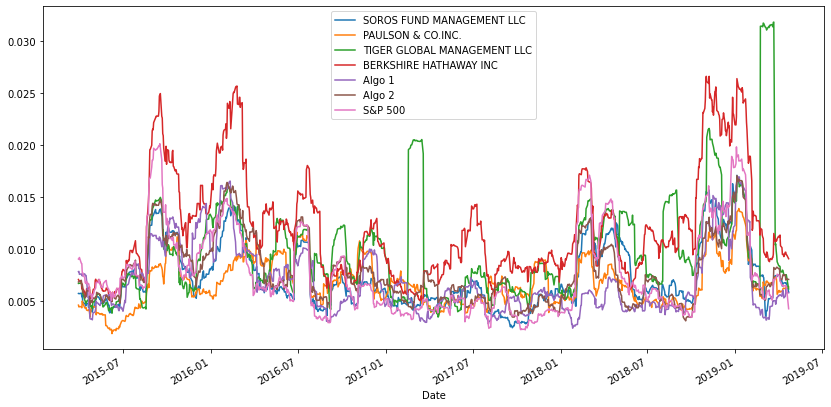

In [69]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Std_Dev_Portfolio_21day = Whale_Algo_SP500_Daily_Returns.rolling(window = 21).std()
Std_Dev_Portfolio_21day.dropna()
# Plot the rolling standard deviation
Std_Dev_Portfolio_21day.plot(figsize = (14,7))

### Calculate and plot the correlation

In [74]:
# Calculate the correlation
Std_Dev_Portfolio_21day_correlation = Std_Dev_Portfolio_21day.corr()
Std_Dev_Portfolio_21day_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.664526,0.451455,0.859050,0.721419,0.872868,0.894833
PAULSON & CO.INC.,0.664526,1.000000,0.407718,0.631143,0.585529,0.688516,0.581662
TIGER GLOBAL MANAGEMENT LLC,0.451455,0.407718,1.000000,0.412728,0.265495,0.359271,0.406437
BERKSHIRE HATHAWAY INC,0.859050,0.631143,0.412728,1.000000,0.794150,0.824796,0.798797
Algo 1,0.721419,0.585529,0.265495,0.794150,1.000000,0.760948,0.684468
Algo 2,0.872868,0.688516,0.359271,0.824796,0.760948,1.000000,0.889888
S&P 500,0.894833,0.581662,0.406437,0.798797,0.684468,0.889888,1.000000


<AxesSubplot:>

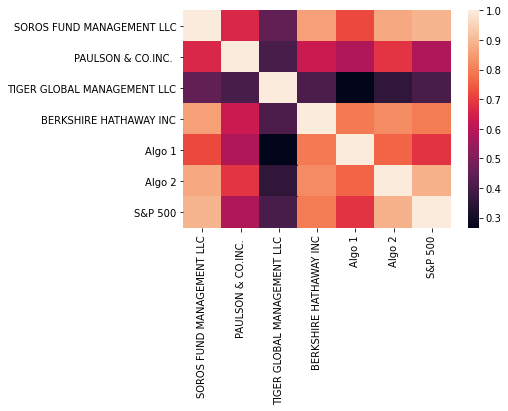

In [75]:
# Display de correlation matrix
sn.heatmap(Std_Dev_Portfolio_21day_correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns'}, xlabel='Date'>

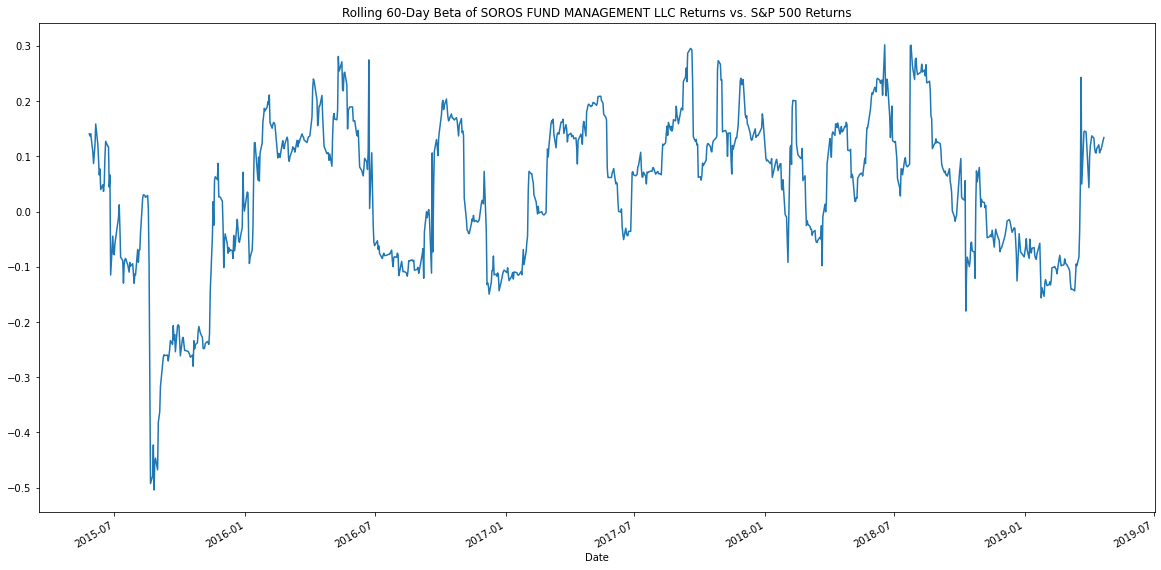

In [71]:
# Calculate covariance of a single portfolio
covariance_soros = Whale_Algo_SP500_Daily_Returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(Whale_Algo_SP500_Daily_Returns['S&P 500'])
# Calculate variance of S&P 500
variance = Whale_Algo_SP500_Daily_Returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).var()
# Computing beta
beta_soros = covariance_soros / variance
# Plot beta trend
beta_soros.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
Rolling_21day_EWM = Whale_Algo_SP500_Daily_Returns.ewm(span = 21).mean()
Rolling_21day_EWM


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004290
2015-03-04,0.000565,-0.000674,-0.001563,-0.000921,-0.005424,0.000813,0.001295
2015-03-05,0.001827,0.001063,-0.000131,0.001874,-0.003790,0.002096,0.006117
2015-03-06,-0.000964,-0.000267,-0.002526,-0.002420,-0.004125,-0.001791,0.003259
2015-03-09,-0.000593,0.000810,-0.000519,-0.002236,-0.004442,-0.001049,0.006584
...,...,...,...,...,...,...,...
2019-04-25,0.001592,-0.000271,-0.000367,0.001858,-0.000039,0.000311,-0.001871
2019-04-26,0.002188,0.000587,0.000789,0.002638,0.000235,0.000760,-0.001871
2019-04-29,0.002103,0.000780,0.001286,0.002873,0.000687,0.000949,-0.001871


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [57]:
# Annualized Sharpe Ratios

Annualized_Sharpe_Ratio = (Whale_Algo_SP500_Daily_Returns.mean())/(Whale_Algo_SP500_Daily_Returns.std()*np.sqrt(252))

<AxesSubplot:>

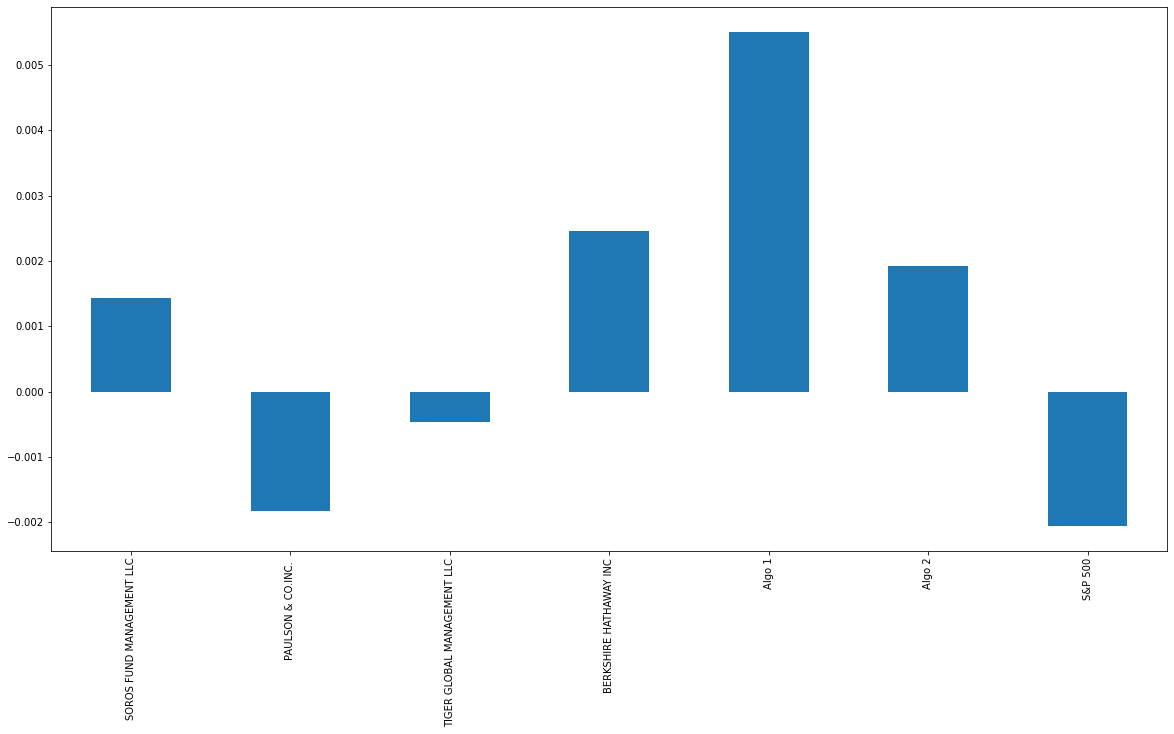

In [58]:
# Visualize the sharpe ratios as a bar plot
Annualized_Sharpe_Ratio.plot.bar(figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 far out performs the S&P 500 and all Market porfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
goog_finance_path = Path("./Resources/goog_finance.csv")
goog_finance_df = pd.read_csv(goog_finance_path)
# Reset Date index
goog_finance_df['Date'] = pd.to_datetime(goog_finance_df['Date'])
goog_finance_df.set_index('Date', inplace = True)
goog_finance_df.columns = ["GOOG"]
goog_finance_df.head()

,GOOG
Date,
2019-02-12,1121.37
2019-02-13,1120.16
2019-02-14,1121.67
2019-02-15,1113.65
2019-02-19,1118.56


In [34]:
# Reading data from 2nd stock
aapl_finance_path = Path("./Resources/aapl_finance.csv")
aapl_finance_df = pd.read_csv(aapl_finance_path)
# Reset Date index
aapl_finance_df['Date'] = pd.to_datetime(aapl_finance_df['Date'])
aapl_finance_df.set_index('Date', inplace = True)
aapl_finance_df.columns = ["AAPL"]
aapl_finance_df.head()

,AAPL
Date,
2019-02-12,42.72
2019-02-13,42.55
2019-02-14,42.70
2019-02-15,42.61
2019-02-19,42.73


In [35]:
# Reading data from 3rd stock
cost_finance_path = Path("./Resources/cost_finance.csv")
cost_finance_df = pd.read_csv(cost_finance_path)
# Reset Date index
cost_finance_df['Date'] = pd.to_datetime(cost_finance_df['Date'])
cost_finance_df.set_index('Date', inplace = True)
cost_finance_df.columns = ["COST"]
cost_finance_df.head()

,COST
Date,
2019-02-12,211.90
2019-02-13,212.80
2019-02-14,213.84
2019-02-15,216.47
2019-02-19,218.12


In [36]:
# Combine all stocks in a single DataFrame
goog_aapl_cost_finance_df = goog_finance_df.join([aapl_finance_df, cost_finance_df])
goog_aapl_cost_finance_df

,GOOG,AAPL,COST
Date,,,
2019-02-12,1121.37,42.72,211.90
2019-02-13,1120.16,42.55,212.80
2019-02-14,1121.67,42.70,213.84
2019-02-15,1113.65,42.61,216.47
2019-02-19,1118.56,42.73,218.12
...,...,...,...
2019-05-07,1174.10,50.72,240.18
2019-05-08,1166.27,50.73,241.34
2019-05-09,1162.38,50.18,243.47


In [37]:
# Calculate daily returns
daily_returns_goog_aapl_cost_finance_df = goog_aapl_cost_finance_df.pct_change()

# Drop NAs
daily_returns_goog_aapl_cost_finance_df.dropna(inplace = True)

# Display sample data
daily_returns_goog_aapl_cost_finance_df.head(10)


,GOOG,AAPL,COST
Date,,,
2019-02-13,-0.001079,-0.003979,0.004247
2019-02-14,0.001348,0.003525,0.004887
2019-02-15,-0.007150,-0.002108,0.012299
2019-02-19,0.004409,0.002816,0.007622
2019-02-20,-0.004255,0.006553,-0.004630
2019-02-21,-0.015110,-0.005580,-0.008659
2019-02-22,0.012215,0.010989,0.004925
2019-02-25,-0.000874,0.007401,0.003514
2019-02-26,0.005165,0.000459,0.002580


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_goog_aapl_cost_finance_df.dot(weights)

# Display sample data
portfolio_returns

Date
2019-02-13   -0.000270
2019-02-14    0.003254
2019-02-15    0.001014
2019-02-19    0.004949
2019-02-20   -0.000778
                ...   
2019-05-07   -0.018766
2019-05-08   -0.000547
2019-05-09   -0.001784
2019-05-10   -0.000443
2019-05-13   -0.035517
Length: 62, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
All_Portfolios = Whale_Algo_SP500_Daily_Returns.join([daily_returns_goog_aapl_cost_finance_df])
All_Portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG,AAPL,COST
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004290,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001428,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014486,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003848,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017123,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,NaN,0.005932,-0.009075,-0.009518
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,NaN,0.006910,-0.004677,-0.007248
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,NaN,0.012105,0.001370,0.001887


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_Portfolios.dropna(inplace = True)
All_Portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG,AAPL,COST
Date,,,,,,,,,,
2019-02-13,0.000000,0.000000,0.000000,0.000000,0.000058,0.001786,0.002914,-0.001079,-0.003979,0.004247
2019-02-14,0.002795,0.001987,-0.004381,-0.003987,0.002285,-0.002618,-0.010811,0.001348,0.003525,0.004887
2019-02-15,0.006410,0.007684,0.010389,0.005964,-0.001310,0.009946,-0.001439,-0.007150,-0.002108,0.012299
2019-02-19,0.003437,0.000896,0.002877,0.005298,0.001755,0.006377,-0.001796,0.004409,0.002816,0.007622
2019-02-20,0.003650,-0.001690,0.005369,0.003833,-0.000007,0.001218,0.003605,-0.004255,0.006553,-0.004630
2019-02-21,-0.001401,-0.004180,-0.001717,-0.006760,-0.000166,-0.000914,-0.006447,-0.015110,-0.005580,-0.008659
2019-02-22,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,-0.001431,0.012215,0.010989,0.004925
2019-02-25,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.001074,-0.000874,0.007401,0.003514
2019-02-26,-0.006030,-0.006118,-0.017294,-0.001617,0.005112,-0.002075,0.000358,0.005165,0.000459,0.002580


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
All_Portfolios_std = All_Portfolios.std()
All_Portfolios_std

SOROS FUND MANAGEMENT LLC      0.005776
PAULSON & CO.INC.              0.006244
TIGER GLOBAL MANAGEMENT LLC    0.021879
BERKSHIRE HATHAWAY INC         0.008812
Algo 1                         0.005113
Algo 2                         0.006662
S&P 500                        0.005807
GOOG                           0.009653
AAPL                           0.010594
COST                           0.010608
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

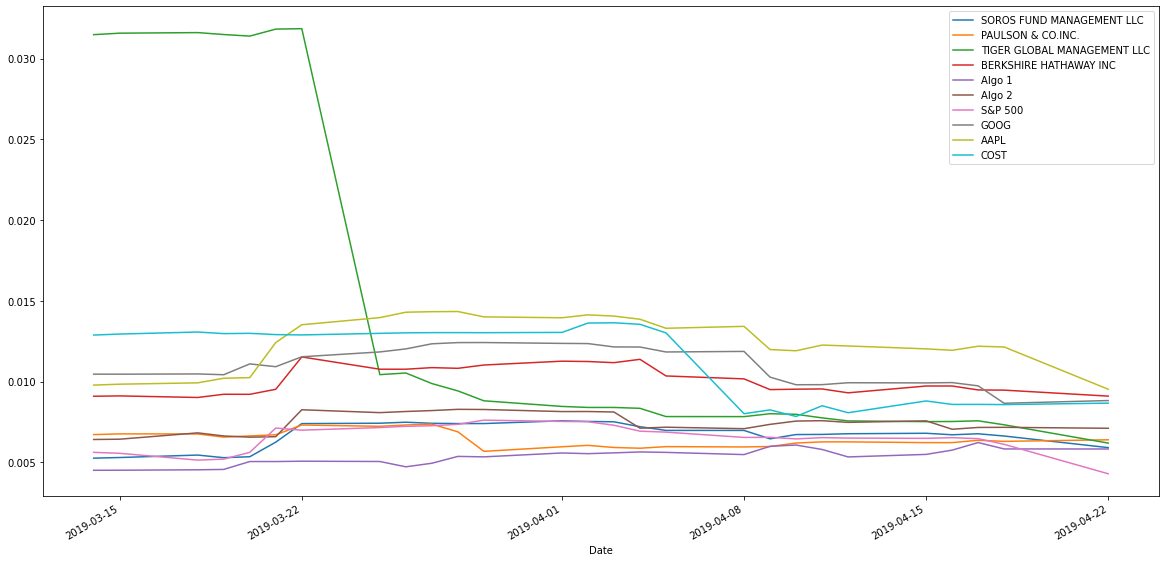

In [47]:
# Calculate rolling standard deviation
All_Portfolios_std_rolling21 = All_Portfolios.rolling(window=21).std()
All_Portfolios_std_rolling21
# Plot rolling standard deviation
All_Portfolios_std_rolling21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

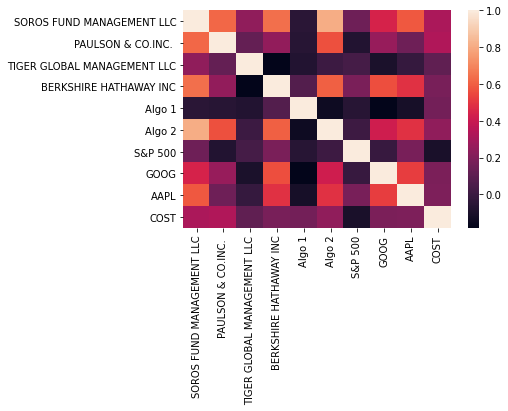

In [76]:
# Calculate and plot the correlation
All_Portfolios_corr = All_Portfolios.corr()
sn.heatmap(All_Portfolios_corr)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

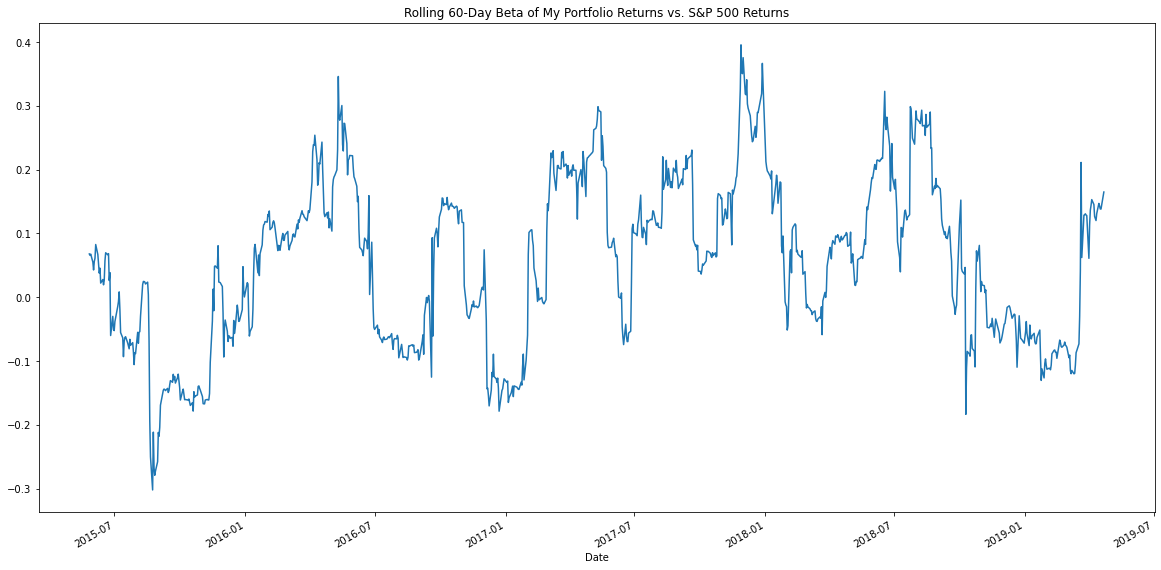

In [81]:
# Calculate and plot Beta
covariance_all = daily_returns_goog_aapl_cost_finance_df.rolling(window=60).cov(Whale_Algo_SP500_Daily_Returns['S&P 500'])
# Calculate variance of S&P 500
variance = Whale_Algo_SP500_Daily_Returns['S&P 500'].rolling(window=60).var()
# Computing beta
covariance_all = covariance_soros / variance
# Plot beta trend
covariance_all.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio Returns vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Calculate Annualzied Sharpe Ratios
Annualized_Sharpe_Ratio_All = (All_Portfolios.mean())/(All_Portfolios.std()*np.sqrt(252))

<AxesSubplot:>

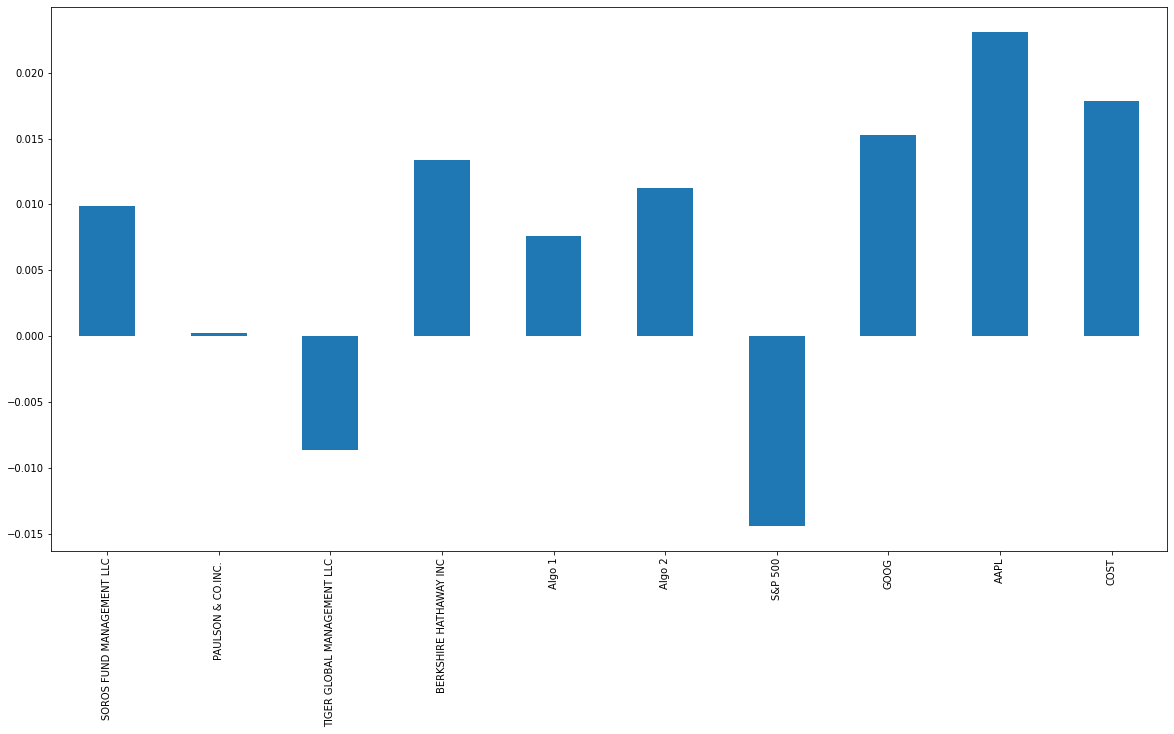

In [84]:
# Visualize the sharpe ratios as a bar plot
Annualized_Sharpe_Ratio_All.plot.bar(figsize = (20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
# Based on the Sharpe Ratio my porfolio does much better than the S&P 500 with AAPL doing the best followed by COST then GOOG